In [2]:
## LOAD MNIST DATA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\Admin\\Documents\\GitHub\\Code\\AppliedAI\\Content\\14. PCA')

In [3]:
d0=pd.read_csv('mnist_train.csv')

In [4]:
l=d0['label']

In [5]:
d0=d0.drop('label',axis=1)

In [6]:
print(l.shape)
print(d0.shape)

(42000,)
(42000, 784)


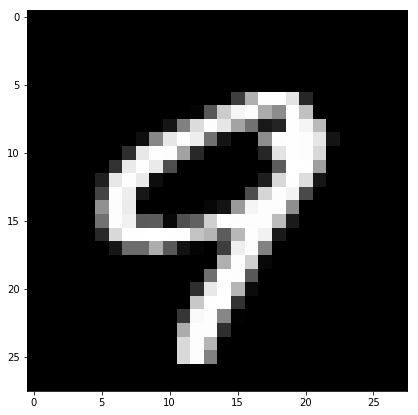

In [7]:
plt.figure(figsize=(7,7))
idx=100
grid_data=d0.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

In [9]:
# 2D Visualization Using PCA
labels=l.head(15000)
data=d0.head(15000)

print("the shape of sample data=",data.shape)

the shape of sample data= (15000, 784)


In [11]:
# Data preprocessing : Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [16]:
## Find the co-vairance matrix which is : AT*A
sample_data=standardized_data

## Matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T,sample_data)

print('shape of covariance matrix is ',covar_matrix.shape)

shape of covariance matrix is  (784, 784)


In [19]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))
print("shape of eigh vectors =",vectors.shape)
vectors=vectors.T
print('updated shape of eigh vectors =',vectors.shape)
print('shpe of values =',values)

shape of eigh vectors = (784, 2)
updated shape of eigh vectors = (2, 784)
shpe of values = [435532.55785282 605719.29173629]


In [44]:
import matplotlib.pyplot as plt
new_coordinates=np.matmul(vectors,sample_data.T)
print("resultant new data points shape",vectors.shape,"x",sample_data.T.shape,"=",new_coordinates.shape)


resultant new data points shape (2, 784) x (784, 15000) = (2, 15000)


In [45]:
import pandas as pd
import numpy as np
## appending label to 2d projected data
new_coordinates=np.vstack((new_coordinates,labels)).T

dataframe=pd.DataFrame(data=new_coordinates,columns=('1st principal','2nd principal','output'))
dataframe.shape

(15000, 3)